<a href="https://colab.research.google.com/github/alexandergribenchenko/Data_Science_Finanzas/blob/main/DS_FIN_02_Mercados.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# A. Librerías

In [1]:
!pip install yfinance --quiet

In [2]:
import yfinance as yf
from datetime import datetime
import pandas as pd
pd.set_option('display.max_columns', None)
pd.set_option('display.float_format', '{:,.2f}'.format)
# pd.set_option('display.max_rows', None)

# 01. Data raw

## 01.01. Tabla salarios, inflación, USDCOP
- salario_min_COP (Wikipedia)
- inflacion_anual_COP_pct (Banco de la Republica de Colombia)
- USDCOP (Banco de la Republica de Colombia, 1990 en adelante, TRM precio primer día del año).
- inflacion_anual_USD_pct (Banco mundial)

### ---> Tabla general

In [3]:
data = {
    "año": list(range(1984, 2026)),
    "salario_min_COP": list(map(float, [
        11298, 13558, 16811, 20510, 25637, 32560, 41025, 51716, 65190, 81510, 98700,
        118934, 142125, 172005, 203826, 236460, 260100, 286000, 309000, 332000,
        358000, 381500, 408000, 433700, 461500, 496900, 515000, 535600, 566700,
        589500, 616000, 644350, 689455, 737717, 781242, 828116, 877803, 908526,
        1000000, 1160000, 1300000, 1423500
    ])),
    "inflacion_anual_COP_pct": [
        16.64, 18.28, 22.45, 20.95, 24.02, 28.12, 26.12, 32.36, 26.82, 25.13,
        22.60, 22.59, 19.46, 21.63, 17.68, 16.70, 9.23, 8.75, 7.65, 6.99, 6.49,
        5.50, 4.85, 4.48, 5.69, 7.67, 2.00, 3.17, 3.73, 2.44, 1.94, 3.66, 6.77,
        5.75, 4.09, 3.18, 3.80, 1.61, 5.62, 13.12, 9.28, 5.20
    ],
     "inflacion_anual_USD_pct": [
    3.21, 4.30, 3.55, 1.90, 3.66, 4.08, 4.83, 5.40, 4.23, 3.03, 2.95,
    2.61, 2.81, 2.93, 2.34, 1.55, 2.19, 3.38, 2.83, 1.59, 2.27,
    2.68, 3.39, 3.23, 2.85, 3.84, -0.36, 1.64, 3.16, 2.07, 1.46,
    1.62, 0.12, 1.26, 2.13, 2.44, 1.81, 1.23, 4.70, 8.00, 4.12, 2.95
],
    "USDCOP": [
    100.82, 142.31, 194.26, 242.61, 299.17, 382.57, 507.21, 605.41, 632.37, 737.98, 804.33, 831.27, 987.65, 1005.33, 1293.58, 1542.11, 1873.77, 2229.18,
    2291.18, 2864.79, 2778.21, 2389.75, 2284.22, 2238.79, 2014.76, 2243.59, 2044.23,
    1913.98, 1942.7, 1768.23, 1926.83, 2392.46, 3149.47, 3000.71, 2984.00, 3249.75,
    3277.14, 3432.5, 3981.16, 4810.2, 3822.05, 4409.15
]
}

df = pd.DataFrame(data)

df["variacion_salario_min_COP_pct"] = df["salario_min_COP"].pct_change() * 100
df["variacion_usd_pct"] = df["USDCOP"].pct_change() * 100
df["salario_min_USD"] = round(df["salario_min_COP"]/df["USDCOP"], 2)
df["variacion_usd_pct"] = df["USDCOP"].pct_change() * 100
df["variacion_salario_min_USD_pct"] = df["salario_min_USD"].pct_change() * 100

df = df[['año','salario_min_COP', 'variacion_salario_min_COP_pct',
         'inflacion_anual_COP_pct', 'inflacion_anual_USD_pct', 'USDCOP', 'variacion_usd_pct',
         'salario_min_USD', 'variacion_salario_min_USD_pct']]

df

,año,salario_min_COP,variacion_salario_min_COP_pct,inflacion_anual_COP_pct,inflacion_anual_USD_pct,USDCOP,variacion_usd_pct,salario_min_USD,variacion_salario_min_USD_pct
0,1984,"11,298.00",NaN,16.64,3.21,100.82,NaN,112.06,NaN
1,1985,"13,558.00",20.00,18.28,4.30,142.31,41.15,95.27,-14.98
2,1986,"16,811.00",23.99,22.45,3.55,194.26,36.50,86.54,-9.16
3,1987,"20,510.00",22.00,20.95,1.90,242.61,24.89,84.54,-2.31
4,1988,"25,637.00",25.00,24.02,3.66,299.17,23.31,85.69,1.36
5,1989,"32,560.00",27.00,28.12,4.08,382.57,27.88,85.11,-0.68
6,1990,"41,025.00",26.00,26.12,4.83,507.21,32.58,80.88,-4.97
7,1991,"51,716.00",26.06,32.36,5.40,605.41,19.36,85.42,5.61
8,1992,"65,190.00",26.05,26.82,4.23,632.37,4.45,103.09,20.69
9,1993,"81,510.00",25.03,25.13,3.03,737.98,16.70,110.45,7.14


### ---> Comportamiento USDCOP (últimos 5 - 10 - 20 años)

In [4]:
round(df[df.año>=2020].variacion_usd_pct.mean(),2)

np.float64(6.2)

In [5]:
round(df[df.año>=2015].variacion_usd_pct.mean(),2)

np.float64(8.79)

In [6]:
round(df[df.año>=2005].variacion_usd_pct.mean(),2)

np.float64(3.04)

In [7]:
TC_final = df.USDCOP[df.año==2025].iloc[0]
TC_inicial = df.USDCOP[df.año==2020].iloc[0]
years = 5

deval_prom = (TC_final/TC_inicial)**(1/years) - 1
print(deval_prom * 100)

6.113826540416367


In [8]:
TC_final = df.USDCOP[df.año==2025].iloc[0]
TC_inicial = df.USDCOP[df.año==2015].iloc[0]
years = 10

deval_prom = (TC_final/TC_inicial)**(1/years) - 1
print(deval_prom * 100)

6.304345720281446


In [9]:
TC_final = df.USDCOP[df.año==2025].iloc[0]
TC_inicial = df.USDCOP[df.año==2005].iloc[0]
years = 20

deval_prom = (TC_final/TC_inicial)**(1/years) - 1
print(deval_prom * 100)

3.1098417176110837


In [10]:
P = 2392          # Capital inicial
r = 0.063      # Tasa anual (5.13%)
n = 10          # Años

monto_final = P * (1 + r)**n
print(f"Crecimiento acumulado en 10 años: {monto_final:.4f}")

Crecimiento acumulado en 10 años: 4406.5005


### ---> Comportamiento salario_min_COP: (últimos 5 - 10 - 20 años)

In [11]:
round(df[df.año>=2020].variacion_salario_min_COP_pct.mean(),2)

np.float64(9.52)

In [12]:
round(df[df.año>=2015].variacion_salario_min_COP_pct.mean(),2)

np.float64(7.97)

In [13]:
round(df[df.año>=2005].variacion_salario_min_COP_pct.mean(),2)

np.float64(6.83)

In [14]:
TC_final = df.salario_min_COP[df.año==2025].iloc[0]
TC_inicial = df.salario_min_COP[df.año==2020].iloc[0]
years = 5

deval_prom = (TC_final/TC_inicial)**(1/years) - 1
print(deval_prom * 100)

10.151922696783355


In [15]:
TC_final = df.salario_min_COP[df.año==2025].iloc[0]
TC_inicial = df.salario_min_COP[df.año==2015].iloc[0]
years = 10

deval_prom = (TC_final/TC_inicial)**(1/years) - 1
print(deval_prom * 100)

8.248917949651036


In [16]:
TC_final = df.salario_min_COP[df.año==2025].iloc[0]
TC_inicial = df.salario_min_COP[df.año==2005].iloc[0]
years = 20

deval_prom = (TC_final/TC_inicial)**(1/years) - 1
print(deval_prom * 100)

6.80538416525982


### ---> Comportamiento inflacion_anual_COP_pct: (últimos 5 - 10 - 20 años)

In [17]:
round(df[df.año>=2020].inflacion_anual_COP_pct.mean(),2)

np.float64(6.44)

In [18]:
round(df[df.año>=2015].inflacion_anual_COP_pct.mean(),2)

np.float64(5.64)

In [19]:
round(df[df.año>=2005].inflacion_anual_COP_pct.mean(),2)

np.float64(4.93)

### ---> Comportamiento inflacion_anual_USD_pct: (últimos 5 - 10 - 20 años)

In [20]:
round(df[df.año>=2020].inflacion_anual_USD_pct.mean(),2)

np.float64(3.8)

In [21]:
round(df[df.año>=2015].inflacion_anual_USD_pct.mean(),2)

np.float64(2.76)

In [22]:
round(df[df.año>=2005].inflacion_anual_USD_pct.mean(),2)

np.float64(2.59)

## 01.02. Tablas USDCOP, BTCUSDT

In [23]:
# Descargar datos del dólar en pesos colombianos
df_usdcop = yf.download('USDCOP=X', start='2004-01-01', end='2025-01-01', interval='1d', auto_adjust=True)

# Formatear columnas
df_usdcop = df_usdcop.reset_index()
df_usdcop.columns = df_usdcop.columns.get_level_values(0)
df_usdcop.columns.name = None
df_usdcop.columns = df_usdcop.columns.str.lower()

# Insertar columna de asset
df_usdcop.insert(0, 'asset', 'USD-COP')

# Ordenar columnas como en tu ejemplo
columns_order = ['asset', 'date', 'open',  'close', 'high', 'low','volume']
df_usdcop = df_usdcop[columns_order]

[*********************100%***********************]  1 of 1 completed


In [24]:
df_usdcop

,asset,date,open,close,high,low,volume
0,USD-COP,2004-01-02,"2,725.00","2,724.00","2,725.00","2,724.00",0
1,USD-COP,2004-01-05,"2,718.50","2,718.50","2,718.50","2,718.50",0
2,USD-COP,2004-01-06,"2,713.00","2,713.00","2,713.00","2,713.00",0
3,USD-COP,2004-01-07,"2,693.40","2,693.40","2,693.40","2,693.40",0
4,USD-COP,2004-01-08,"2,702.10","2,702.10","2,702.10","2,702.10",0
...,...,...,...,...,...,...,...
5451,USD-COP,2024-12-25,"4,372.16","4,372.16","4,391.61","4,364.79",0
5452,USD-COP,2024-12-26,"4,411.06","4,411.06","4,411.06","4,355.76",0
5453,USD-COP,2024-12-27,"4,393.25","4,393.25","4,406.88","4,388.78",0
5454,USD-COP,2024-12-30,"4,350.45","4,350.45","4,417.50","4,400.46",0


In [25]:
df_btc = yf.download('BTC-USD', start='2000-01-01', end='2025-07-10', interval='1d', auto_adjust=True)

df_btc = df_btc.reset_index()
df_btc.columns = df_btc.columns.get_level_values(0)
df_btc.columns.name = None
df_btc.columns = df_btc.columns.str.lower()

df_btc.insert(0, 'asset', 'BTC-USD')

columns_order = ['asset', 'date', 'open',  'close', 'high', 'low','volume']
df_btc = df_btc[columns_order]

[*********************100%***********************]  1 of 1 completed


In [26]:
df_btc

,asset,date,open,close,high,low,volume
0,BTC-USD,2014-09-17,465.86,457.33,468.17,452.42,21056800
1,BTC-USD,2014-09-18,456.86,424.44,456.86,413.10,34483200
2,BTC-USD,2014-09-19,424.10,394.80,427.83,384.53,37919700
3,BTC-USD,2014-09-20,394.67,408.90,423.30,389.88,36863600
4,BTC-USD,2014-09-21,408.08,398.82,412.43,393.18,26580100
...,...,...,...,...,...,...,...
3944,BTC-USD,2025-07-05,"108,015.84","108,231.18","108,381.34","107,842.27",30615537520
3945,BTC-USD,2025-07-06,"108,231.19","109,232.07","109,731.62","107,847.02",36746020463
3946,BTC-USD,2025-07-07,"109,235.33","108,299.85","109,710.25","107,527.05",45415696597
3947,BTC-USD,2025-07-08,"108,298.23","108,950.27","109,198.97","107,499.55",44282204127


In [27]:
df_btc_first_date_per_year = \
  df_btc.\
  sort_values('date').\
  groupby(df_btc['date'].dt.year).\
  agg(['first']).\
  stack(future_stack=True).\
  reset_index(drop=True)

df_btc_first_date_per_year

,asset,date,open,close,high,low,volume
0,BTC-USD,2014-09-17,465.86,457.33,468.17,452.42,21056800
1,BTC-USD,2015-01-01,320.43,314.25,320.43,314.00,8036550
2,BTC-USD,2016-01-01,430.72,434.33,436.25,427.52,36278900
3,BTC-USD,2017-01-01,963.66,998.33,"1,003.08",958.70,147775008
4,BTC-USD,2018-01-01,"14,112.20","13,657.20","14,112.20","13,154.70",10291200000
5,BTC-USD,2019-01-01,"3,746.71","3,843.52","3,850.91","3,707.23",4324200990
6,BTC-USD,2020-01-01,"7,194.89","7,200.17","7,254.33","7,174.94",18565664997
7,BTC-USD,2021-01-01,"28,994.01","29,374.15","29,600.63","28,803.59",40730301359
8,BTC-USD,2022-01-01,"46,311.75","47,686.81","47,827.31","46,288.48",24582667004
9,BTC-USD,2023-01-01,"16,547.91","16,625.08","16,630.44","16,521.23",9244361700


In [21]:
import pandas as pd

# Crear el DataFrame con los datos de la imagen
data = {
    'year': [
        2010, 2011, 2012, 2013, 2014,
        2015, 2016, 2017, 2018, 2019,
        2020, 2021, 2022, 2023, 2024, 2025
    ],
    'price_start': [
        0.003, 0.30, 4.72, 13.5, 758,
        320, 430, 968, 13_860, 3_689,
        7_184, 28_775, 47_902, 16_531,  42_280, 93_300
    ],
    'price_end': [
        0.30, 4.72, 13.51, 758, 320,
        430, 968, 13_860, 3_689, 7_184,
        28_775, 47_902, 16_531, 42_280, 93_300, 108_000
    ],
    'change_pct': [
        9900, 1473, 186, 5507, -58,
        35, 125, 1331, -73, 95,
        301, 66, -65, 156, 121, 16
    ]
}


# Crear DataFrame
df_btc_returns = pd.DataFrame(data)

df_btc_returns['change_calc'] = ((df_btc_returns['price_end'] - df_btc_returns['price_start']) / df_btc_returns['price_start']) * 100

# Crear columna vacía para almacenar ARR 4Y
df_btc_returns['ARR_4Y_avg_pct'] = None

# Recorrer desde el cuarto año en adelante
for i in range(3, len(df_btc_returns)):
    start_price = df_btc_returns.loc[i - 3, 'price_start']
    end_price = df_btc_returns.loc[i, 'price_end']
    arr = (end_price / start_price) ** (1 / 4) - 1
    df_btc_returns.loc[i, 'ARR_4Y_avg_pct'] = arr * 100  # en porcentaje

# Convertir columna a tipo numérico
df_btc_returns['ARR_4Y_avg_pct'] = pd.to_numeric(df_btc_returns['ARR_4Y_avg_pct'])



# Verificar el DataFrame
df_btc_returns


,year,price_start,price_end,change_pct,change_calc,ARR_4Y_avg_pct
0,2010,0.003,0.30,9900,9900.000000,NaN
1,2011,0.300,4.72,1473,1473.333333,NaN
2,2012,4.720,13.51,186,186.228814,NaN
3,2013,13.500,758.00,5507,5514.814815,2142.007121
4,2014,758.000,320.00,-58,-57.783641,471.488086
5,2015,320.000,430.00,35,34.375000,208.945315
6,2016,430.000,968.00,125,125.116279,190.994913
7,2017,968.000,13860.00,1331,1331.818182,106.787130
8,2018,13860.000,3689.00,-73,-73.383838,84.263650
9,2019,3689.000,7184.00,95,94.741122,102.173611


In [28]:
TC_final = 93300
TC_inicial = 7184
years = 5

deval_prom = (TC_final/TC_inicial)**(1/years) - 1
print(deval_prom * 100)  # en porcentaje

66.99484461289325


In [29]:
df_btc.date.iloc[0]

Timestamp('2014-09-17 00:00:00')

In [30]:
datetime.now()

datetime.datetime(2025, 7, 19, 23, 0, 35, 610613)

In [31]:
datetime(2025, 7, 1)

datetime.datetime(2025, 7, 1, 0, 0)

In [34]:
def poder_adquisitivo(valor_presente, inflacion_anual, años):
    return valor_presente / ((1 + inflacion_anual) ** años)

In [38]:
# Ejemplo:
valor_actual = 1000
inflacion = 0.03
años = 2

resultado = poder_adquisitivo(valor_actual, inflacion, años)
print(f"Poder adquisitivo en {años} años: ${resultado:,.0f} COP")


Poder adquisitivo en 2 años: $97 COP


In [43]:
import math

def calcular_tiempo(valor_inicial, valor_final, tasa_interes):
    if valor_inicial <= 0 or valor_final <= 0 or tasa_interes <= 0:
        raise ValueError("Todos los valores deben ser mayores que cero.")
    return math.log(valor_final / valor_inicial) / math.log(1 + tasa_interes)

# Ejemplo:
VI = 25_000      # valor inicial: $1.000.000
VF = 300_000      # valor que quiero alcanzar: $2.000.000
tasa = 0.5          # 8% de interés anual

años = calcular_tiempo(VI, VF, tasa)
print(f"Necesitarás {años:.2f} años")


Necesitarás 6.13 años


In [24]:
import math

def calcular_tiempo(valor_inicial, valor_final, tasa_interes):
    if valor_inicial <= 0 or valor_final <= 0 or tasa_interes <= 0:
        raise ValueError("Todos los valores deben ser mayores que cero.")
    return math.log(valor_final / valor_inicial) / math.log(1 + tasa_interes)

# Ejemplo:
VI = 50_000      # valor inicial: $1.000.000
VF = 300_000      # valor que quiero alcanzar: $2.000.000
tasa = 0.285          # 8% de interés anual

años = calcular_tiempo(VI, VF, tasa)
print(f"Necesitarás {años:.2f} años")

Necesitarás 7.15 años


In [ ]:
import math

def calcular_tiempo(valor_inicial, valor_final, tasa_interes):
    if valor_inicial <= 0 or valor_final <= 0 or tasa_interes <= 0:
        raise ValueError("Todos los valores deben ser mayores que cero.")
    return math.log(valor_final / valor_inicial) / math.log(1 + tasa_interes)

# Ejemplo:
VI = 100_000      # valor inicial: $1.000.000
VF = 1_000_000      # valor que quiero alcanzar: $2.000.000
tasa = 0.5          # 8% de interés anual

años = calcular_tiempo(VI, VF, tasa)
print(f"Necesitarás {años:.2f} años")

In [12]:
def calcular_valor_final(valor_inicial, tasa_interes, tiempo_años):
    if valor_inicial <= 0 or tasa_interes < 0 or tiempo_años < 0:
        raise ValueError("Los valores deben ser positivos.")
    return valor_inicial * (1 + tasa_interes) ** tiempo_años

# Ejemplo:
VI = 108_000      # Valor inicial
r = 0.285         # Tasa de interés (8%)
t = 21              # Tiempo en años

VF = calcular_valor_final(VI, r, t)
print(f"El valor final después de {t} años será de ${VF:,.2f}")


El valor final después de 21 años será de $20,911,704.65


In [4]:
def calcular_valor_final(valor_inicial, tasa_interes, tiempo_años):
    if valor_inicial <= 0 or tasa_interes < 0 or tiempo_años < 0:
        raise ValueError("Los valores deben ser positivos.")
    return valor_inicial * (1 + tasa_interes) ** tiempo_años

# Ejemplo:
VI = 900      # Valor inicial
r = 0.07          # Tasa de interés (8%)
t = 21              # Tiempo en años

VF = calcular_valor_final(VI, r, t)
print(f"El valor final después de {t} años será de ${VF:,.2f}")

El valor final después de 21 años será de $3,726.51


In [7]:
def calcular_valor_final(valor_inicial, tasa_interes, tiempo_años):
    if valor_inicial <= 0 or tasa_interes < 0 or tiempo_años < 0:
        raise ValueError("Los valores deben ser positivos.")
    return valor_inicial * (1 + tasa_interes) ** tiempo_años

# Ejemplo:
VI = 115      # Valor inicial
r = 0.10        # Tasa de interés (8%)
t = 21              # Tiempo en años

VF = calcular_valor_final(VI, r, t)
print(f"El valor final después de {t} años será de ${VF:,.2f}")

El valor final después de 21 años será de $851.03


In [10]:
(280/4000)*100

7.000000000000001

In [49]:
117846.49/2

58923.245

In [51]:
1_950_880*0.04/12

6502.933333333333

In [1]:
2046-2025

21

[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
/tmp/ipython-input-14-2986269133.py:10: FutureWarning: 'Y' is deprecated and will be removed in a future version, please use 'YE' instead.
  btc_annual = btc['Close'].resample('Y').last()
/tmp/ipython-input-14-2986269133.py:11: FutureWarning: 'Y' is deprecated and will be removed in a future version, please use 'YE' instead.
  sp500_annual = sp500['Close'].resample('Y').last()


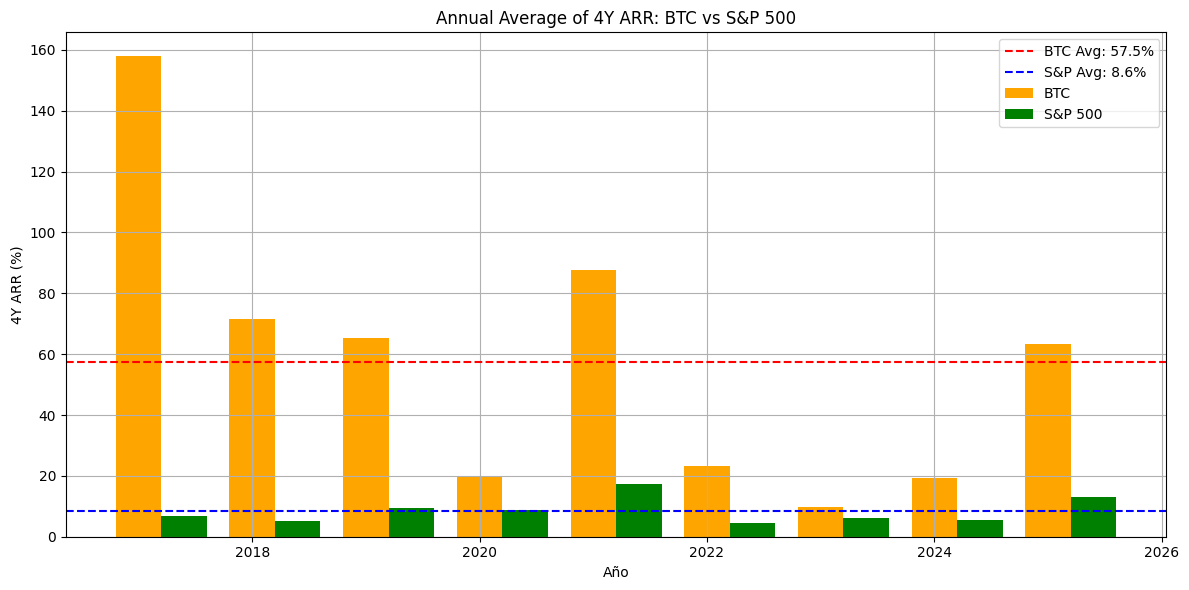

In [14]:
import pandas as pd
import yfinance as yf
import matplotlib.pyplot as plt

# Descargar precios mensuales de BTC y S&P500
btc = yf.download('BTC-USD', start='2010-01-01', interval='1mo', auto_adjust=True)
sp500 = yf.download('^GSPC', start='2010-01-01', interval='1mo', auto_adjust=True)

# Usar el cierre ajustado y resamplear a cierre de fin de año
btc_annual = btc['Close'].resample('Y').last()
sp500_annual = sp500['Close'].resample('Y').last()

# Unir en un solo DataFrame usando concat y alinear fechas
df = pd.concat([btc_annual, sp500_annual], axis=1)
df.columns = ['BTC', 'S&P500']
df.dropna(inplace=True)

# Calcular ARR a 4 años con ventana móvil
def calc_arr(series, years=4):
    arr_list = []
    for i in range(len(series) - years + 1):
        start = series.iloc[i]
        end = series.iloc[i + years - 1]
        arr = (end / start) ** (1 / years) - 1
        arr_list.append(arr * 100)
    return pd.Series(arr_list, index=series.index[years - 1:])

btc_arr = calc_arr(df['BTC'])
sp_arr = calc_arr(df['S&P500'])

# Graficar
plt.figure(figsize=(12, 6))
plt.bar(btc_arr.index.year, btc_arr, width=0.4, label='BTC', color='orange')
plt.bar(sp_arr.index.year + 0.4, sp_arr, width=0.4, label='S&P 500', color='green')
plt.axhline(y=btc_arr.mean(), color='red', linestyle='--', label=f'BTC Avg: {btc_arr.mean():.1f}%')
plt.axhline(y=sp_arr.mean(), color='blue', linestyle='--', label=f'S&P Avg: {sp_arr.mean():.1f}%')
plt.xlabel('Año')
plt.ylabel('4Y ARR (%)')
plt.title('Annual Average of 4Y ARR: BTC vs S&P 500')
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()


In [26]:
0.3-0.19323742

0.10676258

In [29]:
0.05*117000

5850.0

In [30]:
0.2-0.19323742

0.006762580000000018

In [31]:
0.05+0.006762580000000018

0.05676258000000002

In [32]:
0.05676258000000002+0.19323742

0.25

In [35]:
0.05676260*117000

6641.224200000001